In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [33]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
p = 'p'
ns = 'ns'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [46]:
greedy = pd.read_csv('pathological-greedy.csv')
greedy = greedy.groupby([n, m,diff]).min().reset_index()
local = pd.read_csv('pathological-local.csv')
local = local.groupby([n, m,diff]).min().reset_index()
grasp = pd.read_csv('pathological-grasp.csv')
grasp = grasp.groupby([n,m,p,it,diff]).min().reset_index()
grasp = grasp.groupby([n,m,p,it]).median().reset_index()
grasp2 = pd.read_csv('pathological-grasp-2.csv')
grasp2 = grasp2.groupby([n,m,p,it,diff]).min().reset_index()
grasp2 = grasp2.groupby([n,m,p,it]).max().reset_index()

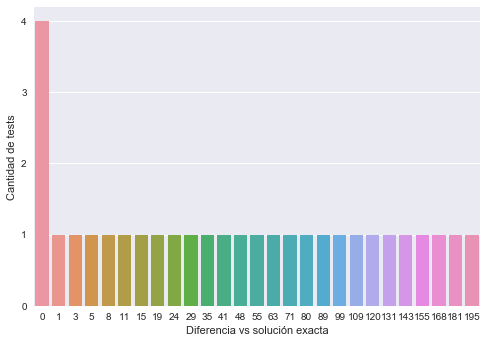

Porcentaje de error: 86.67%


,n,m,diff,ns
max,271.000,360.000,195.000,13200.000
mean,102.667,128.000,63.267,7102.533
std,83.212,110.981,61.710,3629.222


In [35]:
g = sns.countplot(x=diff, data=greedy)
g.set(yticks=range(0,5))
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

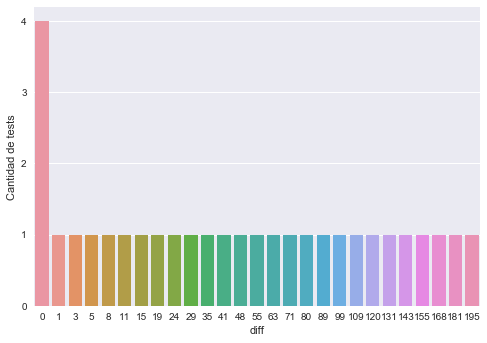

Porcentaje de error: 86.67%


,n,m,diff,ns
max,271.000,360.000,195.000,46304.000
mean,102.667,128.000,63.267,25391.733
std,83.212,110.981,61.710,12556.971


In [36]:
g = sns.countplot(x=diff, data=local)
g.set(yticks=range(0,5))
g.set_ylabel("Cantidad de tests")
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

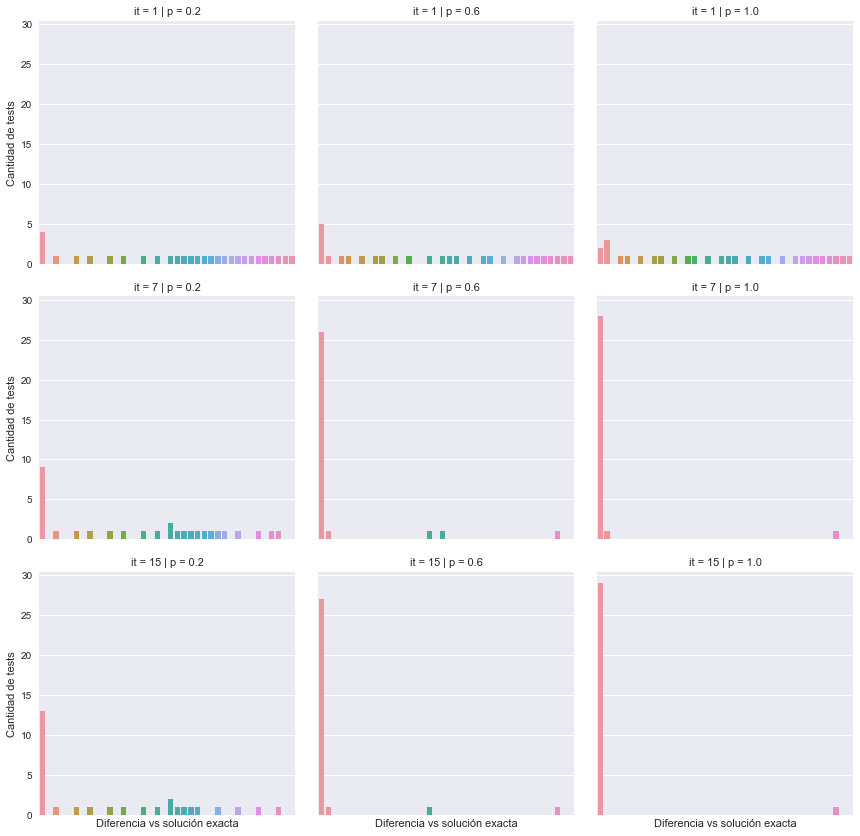

In [47]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp_test,
    col=p, row=it,
    kind="count"
)
g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [48]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

grasp_test = grasp_test.drop(n,1).drop(m,1)
graspCopy = grasp_test.copy()
graspCopy.columns = [p,it,'dif',ns]

grasp_test = grasp_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp_test = grasp_test.assign(error=1)
for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its)].shape
        errcount, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its) & (graspCopy.dif > 0)].shape
        grasp_test.loc[(grasp_test.p == ps) & (grasp_test.it == its), 'error'] = errcount/count
grasp_test

p  it   diff                         ns                         error
               max   mean    std          max        mean         std      
0 0.200   1 97.500 35.617 29.447   718695.500  204206.067  235233.869 0.867
1 0.200   7 84.000 22.350 24.291  5662686.000 1326573.267 1364316.554 0.700
2 0.200  15 84.000 15.767 21.808 14800435.000 3081457.450 3362105.750 0.567
3 0.600   1 97.500 31.150 31.244   719499.000  241819.950  227348.511 0.833
4 0.600   7 84.000  4.083 15.847  7958280.000 2228526.500 2246420.230 0.133
5 0.600  15 84.000  3.400 15.554 19987087.000 5182525.933 5308763.721 0.100
6 1.000   1 97.500 31.667 30.820   810641.500  240112.483  225599.180 0.933
7 1.000   7 84.000  2.817 15.333 10044562.000 2612865.717 2737080.941 0.067
8 1.000  15 84.000  2.800 15.336 22387163.000 5901750.300 6086907.994 0.033

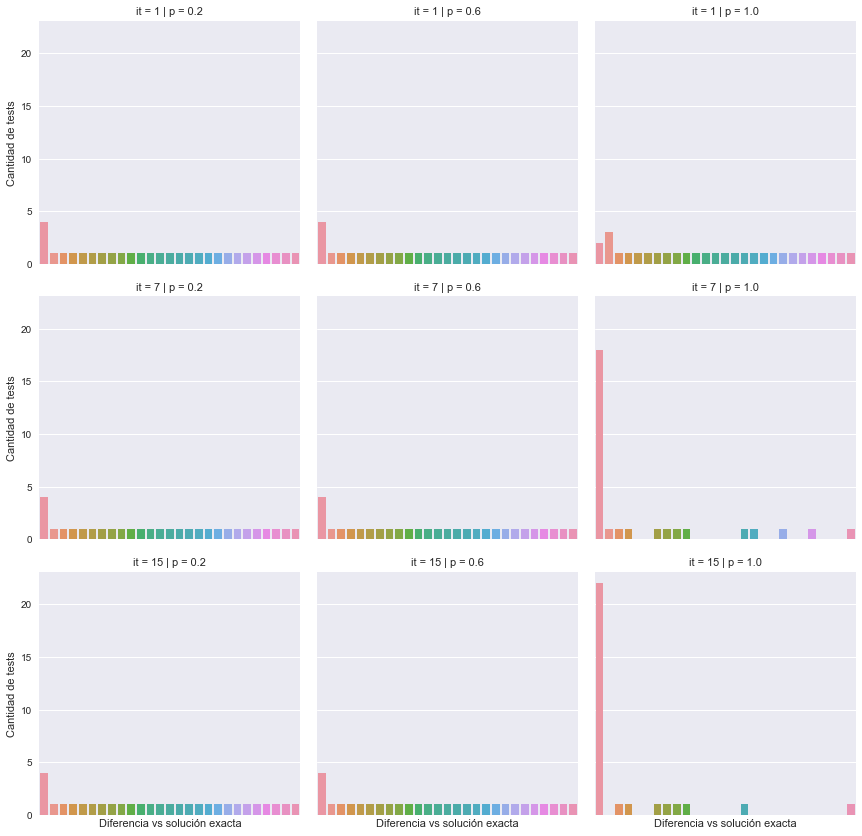

In [49]:
grasp2_test = grasp2[((grasp2.p == 0.2) | (grasp2.p == 0.6) | (grasp2.p == 1))
                    & ((grasp2.it == 1) | (grasp2.it == 7) | (grasp2.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp2_test,
    col=p, row=it,
    kind="count"
)
g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [40]:
grasp2_test = grasp2[((grasp2.p == 0.2) | (grasp2.p == 0.6) | (grasp2.p == 1))
                    & ((grasp2.it == 1) | (grasp2.it == 7) | (grasp2.it == 15))]

grasp2_test = grasp2_test.drop(n,1).drop(m,1)
grasp2Copy = grasp2_test.copy()
grasp2Copy.columns = [p,it,'dif',ns]

grasp2_test = grasp2_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp2_test = grasp2_test.assign(error=1)
for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = grasp2Copy[(grasp2Copy.p == ps) & (grasp2Copy.it == its)].shape
        errcount, _ = grasp2Copy[(grasp2Copy.p == ps) & (grasp2Copy.it == its) & (grasp2Copy.dif > 0)].shape
        grasp2_test.loc[(grasp2_test.p == ps) & (grasp2_test.it == its), 'error'] = errcount/count
grasp2_test

p  it diff                      ns                         error
             max   mean    std       max        mean         std      
0 0.200   1  195 63.267 61.710    142824   66185.733   39564.434 0.867
1 0.200   7  195 63.267 61.710   2286236  975937.900  709071.911 0.867
2 0.200  15  195 63.267 61.710   4995287 2254688.967 1643896.792 0.867
3 0.600   1  195 63.267 61.710   1252104  193265.533  357453.313 0.867
4 0.600   7  195 63.267 61.710   3533591 1295279.867 1047275.003 0.867
5 0.600  15  195 63.267 61.710   6544983 2713630.767 2050117.112 0.867
6 1.000   1  195 63.333 61.640   1675129  456276.400  448271.475 0.933
7 1.000   7  195 23.133 48.345   6259474 1884723.900 1703791.725 0.400
8 1.000  15  195 12.033 37.490  15685527 4400884.700 4228739.708 0.267

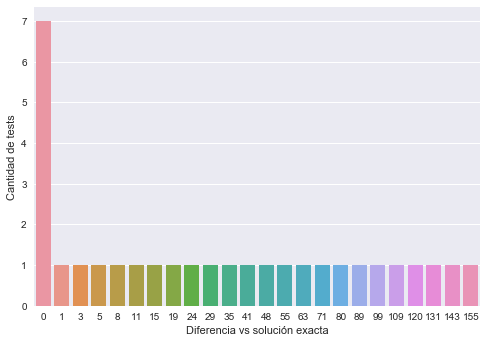

Porcentaje de error: 76.67%
23


,n,m,it,p,diff,ns
max,550.000,630.000,50.000,0.600,155.000,25102060.000
mean,251.167,267.500,50.000,0.600,45.133,9164302.667
std,161.582,188.945,0.000,0.000,49.269,6955619.915


In [42]:
grasp50 = pd.read_csv('pathological-grasp50.csv')
grasp50 = grasp50.groupby([n,m,it,p,diff]).min().reset_index()
grasp50 = grasp50.groupby([n,m,it,p]).max().reset_index()

g = sns.countplot(x=diff, data=grasp50)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

grasp_count = grasp50.groupby([diff])[n].agg(['count']).reset_index()
grasp_sum = grasp_count['count'].agg(['sum']).get(0)

percent = (grasp_sum - grasp_count['count'][0])/grasp_sum
print(error_rate.format(percent*100))
print(grasp_sum - grasp_count['count'][0])

grasp50.agg(['max', 'mean', np.std])